# PROBLEM STATEMENT: Find loan defaults

The Lending Club fincancing company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

In [168]:
#import libraries to be used for data cleaning and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
#Reading data from csv file using pandas
loan = pd.read_csv("loan.csv",low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [170]:
#checking the dimensions
loan.shape

(39717, 111)

In [171]:
#checking the null counts across all the variables/columns of loan dataset
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

OBSERVATION: There are lot of columns with all null values. Let us remove them.

In [172]:
#dropping the columns which has all non-alpha values
loan.dropna(axis = 1, how = 'all', inplace = True)
loan.shape

(39717, 57)

In [173]:
#checking unique values across variables
cols_unique = loan.nunique()
print(cols_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

OBSERVATION: There are lot of columns that have only single value. These variables do not help in the analysis. So let us remove these single valued columns.

In [174]:
#identifying the single valued columns
cols_unique_with1_todrop = cols_unique.loc[cols_unique.values == 1]
cols_unique_with1_todrop.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [175]:
#dropping the single values columns
loan.drop(columns=list(cols_unique_with1_todrop.index), inplace=True)
loan.shape

(39717, 48)

In [176]:
#checking the remaining columns after dropping all single valued columns
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

OBSERVATION:  
* Now we are remained with 48 columns. Of these columns, there are few columns which correspond to the post-approval of loan and are customer behavior variables.  
* As we are analysing the loan applications and the driving factors of loan defaulting before the approval was done, these variables can be removed for our analysis.  
* Let us go ahead and remove these customer behavior variables.

In [177]:
#drop all customer behavior columns for our analysis which are post-approval attributes
cust_behavior_drop = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal',
                 'revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                 'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                 'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
                 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']
loan.drop(columns=cust_behavior_drop, inplace=True)
loan.shape

(39717, 25)

loan.columns

OBSERVATION:  
* Now we are remained with 25 columns.
* Of all these columns, there are columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "addr_state". They do not contribute to the loan defaulting in anyway and hence are irrelevant for our analysis. So let us remove them.  
* "desc" has description (text data) which is also not contributing to defaulting analysi. So let us remove this column.  
* "funded_amnt" is also not required because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the former column.

In [178]:
#dropping all irrelevant columns for our analysis
irrelevant_cols_to_drop = ["id", "member_id", "url", "title", "emp_title", "zip_code", "addr_state",
                          "desc", "funded_amnt"]
loan.drop(columns=irrelevant_cols_to_drop, inplace=True)
loan.shape

(39717, 16)

In [179]:
#checking the columns after removing all the irrelevant columns
loan.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')

In [180]:
#checking loan status value's count
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

The analysis to predict who is likely to default can only be judged for the 'Fully Paid' and 'Charged Off' loans. So 'Current' loans should be discarded.

In [181]:
#checking the unique values for loan status
loan = loan[loan.loan_status != "Current"]
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [182]:
loan.shape

(38577, 16)

## Checking for missing values

In [183]:
(loan.isna().sum()/len(loan.index))*100

loan_amnt               0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

Handling Missing Values:
    Columns with missing values are 'emp_length' and 'pub_rec_bankruptcies'

Before handling missing value for emp_length, lets see what kind of data this column has.

In [184]:
print(loan.emp_length.mode())
loan.emp_length.value_counts()

0    10+ years
dtype: object


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

OBSERVATION: The above value counts of emp_length show that mode value has far higher frequncy than the next most frequent value.  
This means that we can impute the missing values with the mode value as the missing values are in very low percentage. And hence, imputing with mode values doesn't affect the analysis.

In [185]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
loan.emp_length.isna().sum()

0

In [186]:
print(loan.pub_rec_bankruptcies.mode())
loan.pub_rec_bankruptcies.value_counts()

0    0.0
dtype: float64


0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [187]:
loan.pub_rec_bankruptcies.fillna(loan.pub_rec_bankruptcies.mode()[0], inplace = True)
loan.pub_rec_bankruptcies.isna().sum()

0

In [188]:
loan.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0.0
6,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51,0.0
7,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,5.35,0.0
8,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,5.55,0.0
9,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,18.08,0.0
10,6500,6500.0,60 months,14.65%,153.45,C,C3,5 years,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,16.12,0.0


## Standardizing the data

"int_rate" column is suffixed with '%' and hence it can be standardized.

In [189]:
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))

"emp_length" has < 1 year and it can be assumed as 0 and 10+ years can be assumed as 10. And hence it can be standardized.

In [190]:
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [191]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0.0


## Outlier Treatment

<AxesSubplot:ylabel='Frequency'>

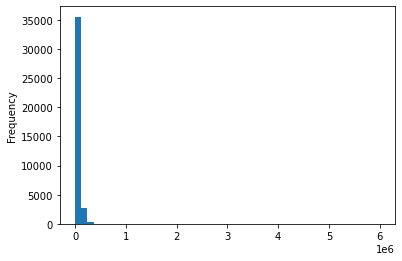

In [192]:
loan.annual_inc.plot.hist(bins=50)

<AxesSubplot:xlabel='annual_inc'>

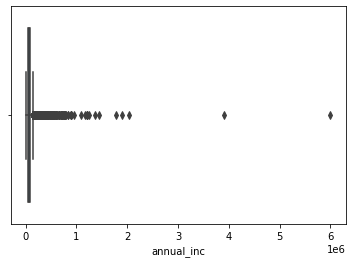

In [193]:
sns.boxplot(data=loan, x="annual_inc")

OBSERVATION: There are visibly outliers being identified in the boxplot. Let us remove them.
Let us see the quantile information.

In [194]:
quantile_info = loan.annual_inc.quantile([0.25, 0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.25     40000.0
0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

OBSERVATION: The values after 95 percentile is clearly disconnected from the normal distribution and the values are skewed at the right side.  
So, let us remove outliers beyong 95 percentile.

In [195]:
annual_inc_95 = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= annual_inc_95]

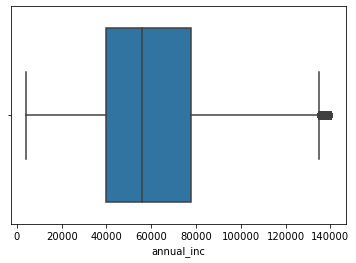

In [196]:
sns.boxplot(data=loan, x="annual_inc")
plt.show()

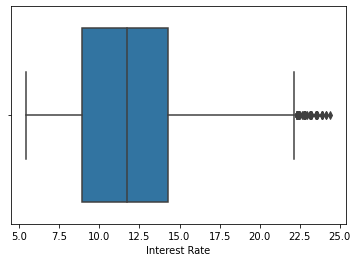

count    36654.000000
mean        11.888080
std          3.667257
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [197]:
sns.boxplot(data=loan, x="int_rate")
plt.xlabel('Interest Rate')
plt.show()
loan.int_rate.describe()

OBSERVATION:  
* Average interest rate is 12 %. After 75%, interest rate rose up to 25% from 15%.  
* The above distribution of "annual_inc" looks good. Lets analyze other numerical variables such as dti, loan_amnt and funded_amnt_inv which may have outliers.

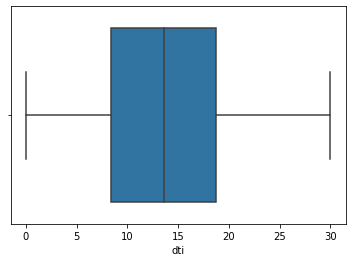

In [198]:
sns.boxplot(data=loan, x="dti")
plt.show()

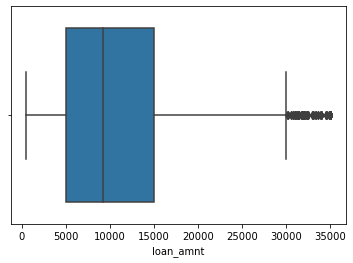

In [199]:
sns.boxplot(data=loan, x="loan_amnt")
plt.show()

In [200]:
loan.loan_amnt.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.500     9250.0
0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

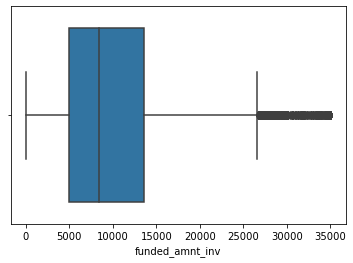

In [201]:
sns.boxplot(data=loan, x="funded_amnt_inv")
plt.show()

In [202]:
loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.500     8375.000000
0.750    13623.731415
0.900    19750.000000
0.950    23941.875589
0.970    24975.000000
0.975    25350.000000
0.980    27950.000000
0.990    31954.028576
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

OBSERVATION:It is clear that there are few values far from normal distribution. However, the distribution is quite continuous. And, hence, there is no need to remove outliers for 'loan_amnt' and 'funded_amnt_inv'

## Visualizing Categorical Data

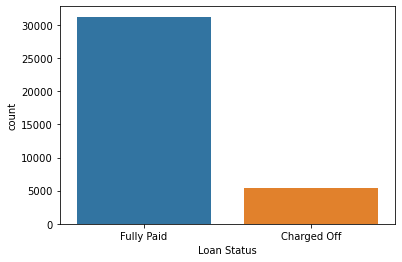

In [203]:
sns.countplot(x = 'loan_status', data = loan)
plt.xlabel('Loan Status')
plt.show()

In [204]:
loan.loan_status.value_counts(normalize=True)

Fully Paid     0.852185
Charged Off    0.147815
Name: loan_status, dtype: float64

OBSERVATION:  
* Majority of the loans are fully paid.
* About 14% are defaulting

#### Analyzing 'grade'

In [205]:
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))


In [206]:
loan['sub_grade'].head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

In [207]:
loan[loan.loan_status == 'Charged Off'].grade.value_counts()

B    1376
C    1325
D    1080
E     660
A     593
F     289
G      95
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

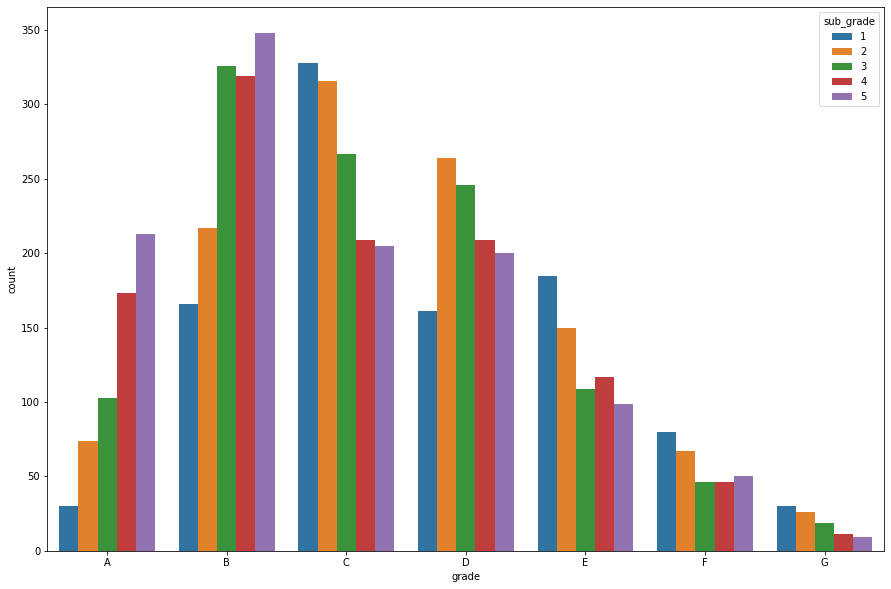

In [208]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade', data = loan[loan.loan_status == 'Charged Off'])

OBSERVATION: By looking at the above diagram, it is evident that probability of defaulting is more if loan applicant grade is 'B'

#### Analyzing 'home_ownership'

In [209]:
#checking unique values for home_ownership
loan['home_ownership'].value_counts()

RENT        18031
MORTGAGE    15675
OWN          2852
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

OBSERVATION:There are only 3 records with 'NONE' value in the data. So let us replace the value with 'OTHER'

In [210]:
#replacing 'NONE' with 'OTHERS'
loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [211]:
loan['home_ownership'].value_counts()

RENT        18031
MORTGAGE    15675
OWN          2852
OTHER          96
Name: home_ownership, dtype: int64

In [212]:
loan[loan.loan_status == 'Charged Off'].home_ownership.value_counts()

RENT        2773
MORTGAGE    2194
OWN          434
OTHER         17
Name: home_ownership, dtype: int64

Text(0.5, 0, 'Home Ownership')

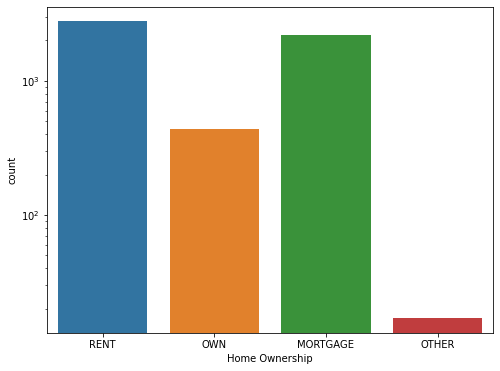

In [213]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Home Ownership')

OBSERVATION: By looking at the above diagram, it is evident that probability of defaulting is more if loan applicant's home ownership is 'RENT'

#### Analyzing 'purpose'

In [214]:
loan[loan.loan_status == 'Charged Off'].purpose.value_counts()

debt_consolidation    2677
other                  605
credit_card            519
small_business         454
home_improvement       322
major_purchase         217
car                    159
medical                104
wedding                 92
moving                  90
house                   55
educational             54
vacation                52
renewable_energy        18
Name: purpose, dtype: int64

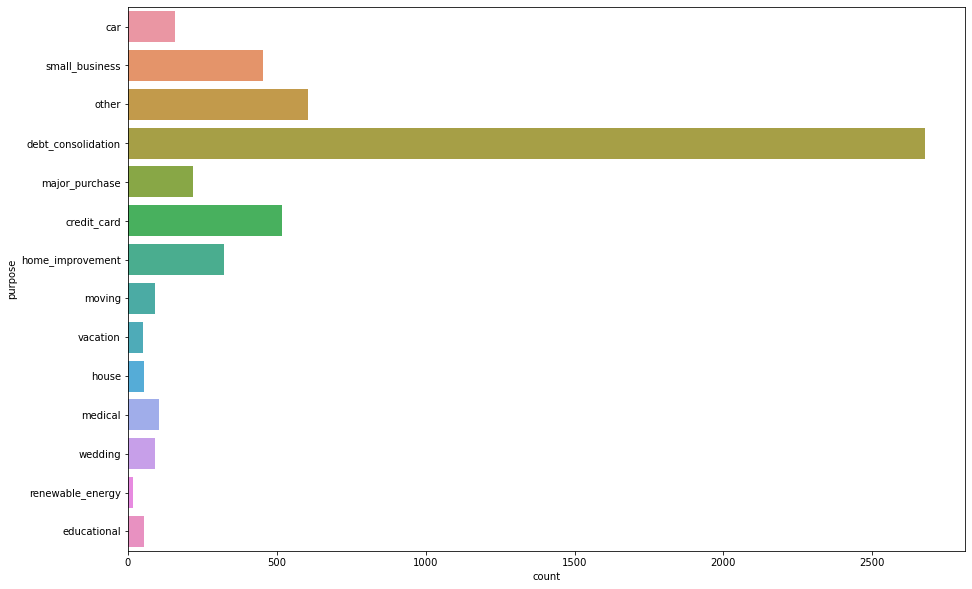

In [215]:
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(y='purpose', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

OBSERVATION: By looking at the above diagram, it is evident that probability of defaulting is more if loan applicant's purpose is debt consolidation.

#### Analyzing 'term'

In [216]:
loan[loan['loan_status']=='Charged Off'].term.value_counts()

 36 months    3114
 60 months    2304
Name: term, dtype: int64

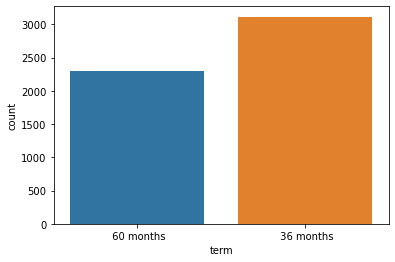

In [217]:
sns.countplot(x='term', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

OBSERVATION: By looking at the above diagram, it is evident that probability of defaulting is more if loan applicant's term is 36 months.

#### Analyzing 'verification_status'

In [218]:
loan[loan['loan_status']=='Charged Off'].verification_status.value_counts()

Not Verified       2096
Verified           1949
Source Verified    1373
Name: verification_status, dtype: int64

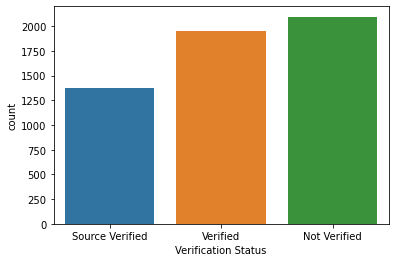

In [219]:
sns.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Verification Status')
plt.show()

OBSERVATION: By looking at the above diagram, it is evident that probability of defaulting is more if loan applicant is not verified.

Let us try to analyse the numerical varaibles.

#### Creating bins for numerical variables in order to make them categorical which can be used for analysis

In [220]:
loan.int_rate.describe()

count    36654.000000
mean        11.888080
std          3.667257
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [221]:
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5, precision=0, labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%'])

In [222]:
loan.annual_inc.describe()

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

In [223]:
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5, precision=0, labels =['4k-31k','31k-58k','58k-85k','85k-112k','112k-141k'])

In [224]:
loan.installment.describe()

count    36654.000000
mean       311.888682
std        199.230096
min         15.690000
25%        163.080000
50%        270.420000
75%        408.480000
max       1305.190000
Name: installment, dtype: float64

In [225]:
loan['installment_groups'] = pd.cut(loan['installment'], bins=7, precision=0, labels =['15-215','215-415','415-615','615-815','815-1015','1015-1215','1215-1310'])

In [226]:
loan.loan_amnt.describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [227]:
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=5, precision=0, labels =['0.5k-7.5k','7.5k-14.5k','14.5k-21.5k','21.5k-28.5k','28.5k-35k'])

In [228]:
loan.funded_amnt_inv.describe()

count    36654.000000
mean      9894.181349
std       6730.756232
min          0.000000
25%       4975.000000
50%       8375.000000
75%      13623.731415
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [229]:
loan['funded_amnt_inv_groups'] = pd.cut(loan['funded_amnt_inv'], bins=7, precision=0, labels =['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

In [230]:
loan.dti.describe()

count    36654.000000
mean        13.446725
std          6.661899
min          0.000000
25%          8.350000
50%         13.580000
75%         18.710000
max         29.990000
Name: dti, dtype: float64

In [231]:
loan['dti_groups'] = pd.cut(loan['dti'], bins=5, precision=0, labels =['0-6','6-12','12-18','18-24','24-30'])

In [232]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,dti,pub_rec_bankruptcies,int_rate_groups,annual_inc_groups,installment_groups,loan_amnt_groups,funded_amnt_inv_groups,dti_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,Fully Paid,credit_card,27.65,0.0,9%-13%,4k-31k,15-215,0.5k-7.5k,0-5k,24-30
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,Charged Off,car,1.00,0.0,13%-17%,4k-31k,15-215,0.5k-7.5k,0-5k,0-6
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,Fully Paid,small_business,8.72,0.0,13%-17%,4k-31k,15-215,0.5k-7.5k,0-5k,6-12
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,Fully Paid,other,20.00,0.0,13%-17%,31k-58k,215-415,7.5k-14.5k,5k-10k,18-24
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,Fully Paid,wedding,11.20,0.0,5%-9%,31k-58k,15-215,0.5k-7.5k,0-5k,6-12


#### Analyzing 'interest rate' with respect to interest rate bins created

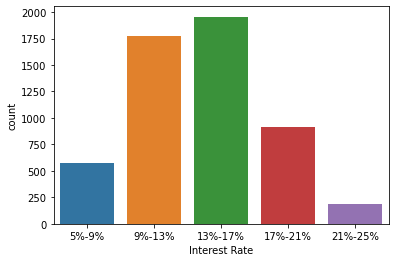

In [233]:
sns.countplot(x='int_rate_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.show()

OBSERVATION:By looking at the above diagram, it is evident that probability of defaulting is more if loan applicant's interest rate is between 13% to 17%.

#### Analyzing 'annual income' with respect to annual income bins created

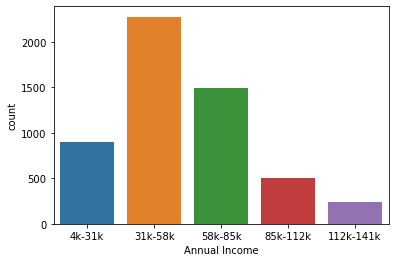

In [234]:
sns.countplot(x='annual_inc_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Annual Income')
plt.show()

OBSERVATION:By looking at the above diagram, it is evident that probability of defaulting is more if loan applicant's annual income is between 31000 to 58000.

#### Analyzing 'installment'  with respect to installment groups created

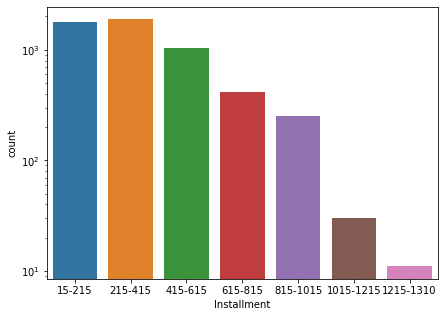

In [235]:
fig,ax = plt.subplots(figsize = (7,5))
sns.countplot(x='installment_groups', data=loan[loan.loan_status == 'Charged Off'])
ax.set_yscale('log')
plt.xlabel('Installment')
plt.show()

OBSERVATION:By looking at the above diagram, it is evident that probability of defaulting is more if loan applicant's installment is between 215 to 415.

#### Analyzing 'loan amount'  with respect to loan amount groups created

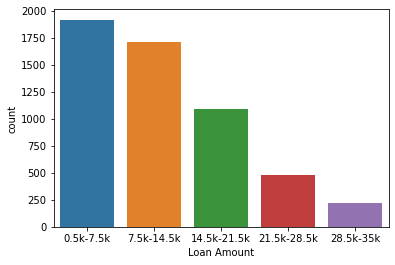

In [236]:
sns.countplot(x='loan_amnt_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Loan Amount')
plt.show()

OBSERVATION:By looking at the above diagram, it is evident that probability of defaulting is more if loan amount of applicant  is between 500 to 7500.

#### Analyzing 'funded amount by investor'  with respect to funded amount by investor groups created

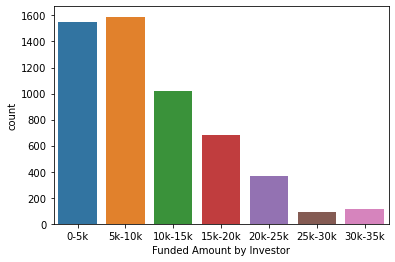

In [237]:
sns.countplot(x='funded_amnt_inv_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Funded Amount by Investor')
plt.show()

OBSERVATION:By looking at the above diagram, it is evident that probability of defaulting is more if funded amount by investor of applicant is between 5000 to 10000.

#### Analyzing 'Debt-To-Income Ratio'  with respect to Debt-To-Income Ratio groups created

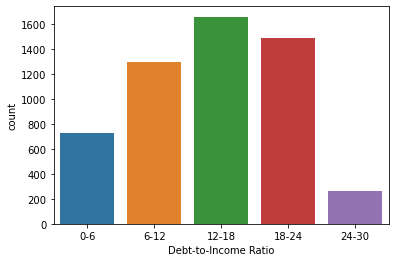

In [238]:
sns.countplot(x='dti_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Debt-to-Income Ratio')
plt.show()

OBSERVATION:By looking at the above diagram, it is evident that probability of defaulting is more if debt-to-income ratio of applicant is between 12 to 18.

#### Analyzing 'employment length'

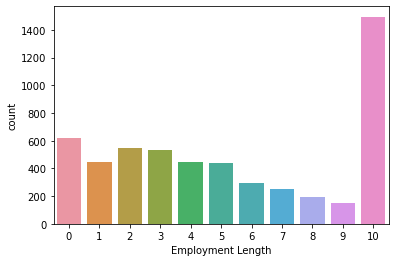

In [239]:
sns.countplot(x='emp_length', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Employment Length')
plt.show()

OBSERVATION:By looking at the above diagram, it is evident that probability of defaulting is more if loan applicant has employment length of 10 or 10+.

#### Analyzing 'pub_rec_bankruptcies'

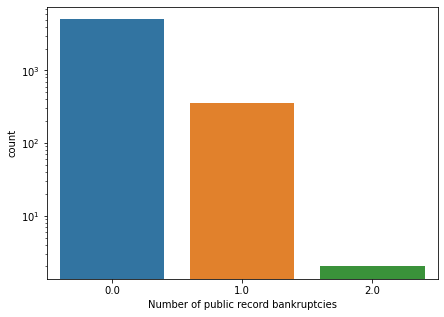

In [240]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec_bankruptcies', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Number of public record bankruptcies')
plt.show()

OBSERVATION: Strangely, the probability of defaulting is more if loan applicant has 0 number of bankruptcies.

#### Analyzing 'issued month and year'

In [241]:
loan.issue_d.sample(10)

25559    Sep-10
32472    Feb-10
1423     Dec-11
33578    Dec-09
35491    Aug-09
32718    Jan-10
22789    Dec-10
20759    Jan-11
32457    Feb-10
17973    Mar-11
Name: issue_d, dtype: object

In [242]:
## Extracting month and year
loan_month_year = loan['issue_d'].str.partition("-", True)     
loan['issue_month']=loan_month_year[0]                       
loan['issue_year']='20' + loan_month_year[2]

In [243]:
loan.sample(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,pub_rec_bankruptcies,int_rate_groups,annual_inc_groups,installment_groups,loan_amnt_groups,funded_amnt_inv_groups,dti_groups,issue_month,issue_year
35980,5000,5000.000000,36 months,9.32,159.74,A,4,2,RENT,63000.0,...,13.79,0.0,9%-13%,58k-85k,15-215,0.5k-7.5k,0-5k,12-18,Jul,2009
5112,20000,19975.000000,60 months,10.65,431.37,B,2,1,MORTGAGE,100000.0,...,12.26,0.0,9%-13%,85k-112k,415-615,14.5k-21.5k,15k-20k,12-18,Oct,2011
14983,5000,5000.000000,60 months,13.49,115.03,C,2,2,RENT,46800.0,...,2.49,0.0,13%-17%,31k-58k,15-215,0.5k-7.5k,0-5k,0-6,May,2011
25259,8700,8600.000000,36 months,6.76,267.68,A,2,5,MORTGAGE,72000.0,...,9.07,0.0,5%-9%,58k-85k,215-415,7.5k-14.5k,5k-10k,6-12,Sep,2010
31003,20000,19400.000000,36 months,11.36,658.23,B,5,1,RENT,48500.0,...,11.98,0.0,9%-13%,31k-58k,615-815,14.5k-21.5k,15k-20k,6-12,Apr,2010
38052,21000,3243.625764,36 months,14.11,718.81,D,1,2,RENT,65000.0,...,5.19,1.0,13%-17%,58k-85k,615-815,14.5k-21.5k,0-5k,0-6,Dec,2008
28313,2800,2775.000000,60 months,13.61,64.59,C,2,0,RENT,50004.0,...,24.69,0.0,13%-17%,31k-58k,15-215,0.5k-7.5k,0-5k,24-30,Jul,2010
8654,14000,14000.000000,36 months,11.99,464.94,B,5,8,RENT,35000.0,...,19.68,0.0,9%-13%,31k-58k,415-615,7.5k-14.5k,10k-15k,18-24,Aug,2011
19859,10000,9950.000000,36 months,10.74,326.16,B,4,4,MORTGAGE,108000.0,...,22.11,1.0,9%-13%,85k-112k,215-415,7.5k-14.5k,5k-10k,18-24,Feb,2011
12518,16000,16000.000000,36 months,10.59,520.72,B,2,10,RENT,45000.0,...,2.45,0.0,9%-13%,31k-58k,415-615,14.5k-21.5k,15k-20k,0-6,Jul,2011


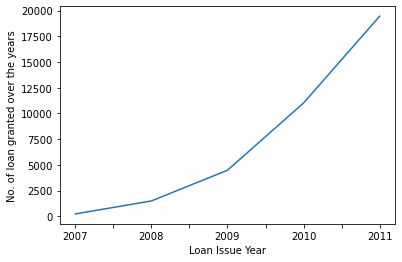

In [244]:
g = loan.groupby('issue_year')['loan_status'].count()
g.plot.line()
plt.xlabel('Loan Issue Year')
plt.ylabel('No. of loan granted over the years')
plt.show()

OBSERVATION: The loan has increased exponentially over the years.

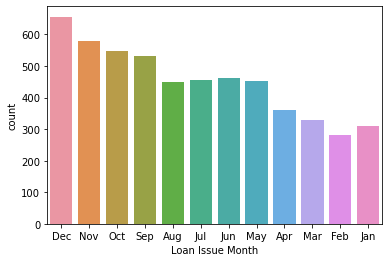

In [245]:
sns.countplot(x='issue_month', data=loan[loan.loan_status=='Charged Off'])
plt.xlabel('Loan Issue Month')
plt.show()

OBSERVATION:By looking at the above diagram, it is evident that probability of defaulting is high for the loan issued in the month of December, possible due to the fact that people take loan to travel and spend money during the Christmas season.

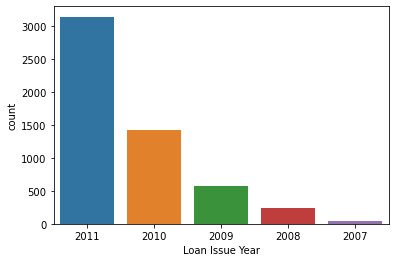

In [246]:
sns.countplot(x='issue_year', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Loan Issue Year')
plt.show()

OBSERVATION:By looking at the above diagram, it is evident that probability of defaulting is high for the loan issued in the year of 2011, possibly due to the fact that there was a financial crisis in USA, assuming the data is of US origin.

## Bi-Variate Analysis

#### Analyzing 'annual income' with other columns for more insights

##### 1. Annual Income vs Loan Purpose

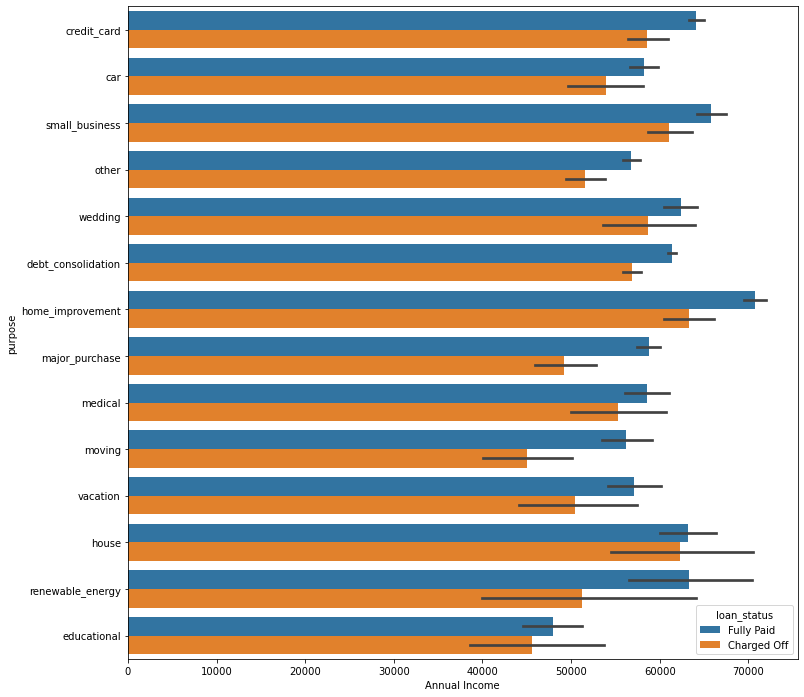

In [247]:
plt.figure(figsize=(12,12))
sns.barplot(data=loan, x='annual_inc', y='purpose', hue='loan_status')
plt.xlabel('Annual Income')
plt.show()

OBSERVATION:  
* Though the number of loans applied and defaulted are the highest, as we saw in our analysis earlier,the above analysis shows that the annual income of those who applied is not the highest.
* Applicants with higher salary has largely applied loans for purposes such as 'home improvement', 'house', 'renewable energy' and 'small business'
* There is a high probability of defaulting when applicants taking loan for 'home improvement' and have income of 60k -70k

##### 2. Annual Income vs Home ownership

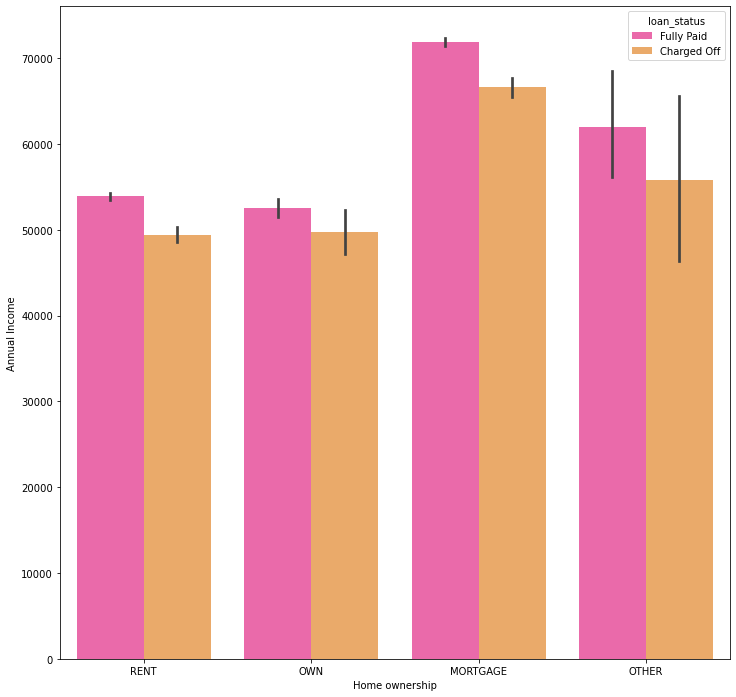

In [248]:
plt.figure(figsize=(12,12))
sns.barplot(data=loan, x='home_ownership', y='annual_inc', hue ='loan_status',palette="spring")
plt.xlabel('Home ownership')
plt.ylabel('Annual Income')
plt.show()

OBSERVATION: There is a high probability of defaulting when applicants taking loan for whose home ownership is 'MORTGAGE' and have income of 60-70k.

##### 3. Annual Income vs Loan Amount

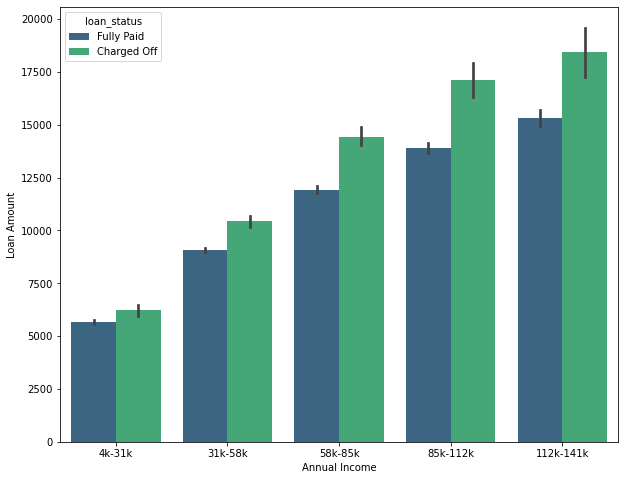

In [249]:
plt.figure(figsize=(10,8))
sns.barplot(data = loan, x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', palette="viridis")
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

OBSERVATION: There is a high probability of defaulting when applicants taking high amount of loan.

##### 4. Annual Income vs Interest rate

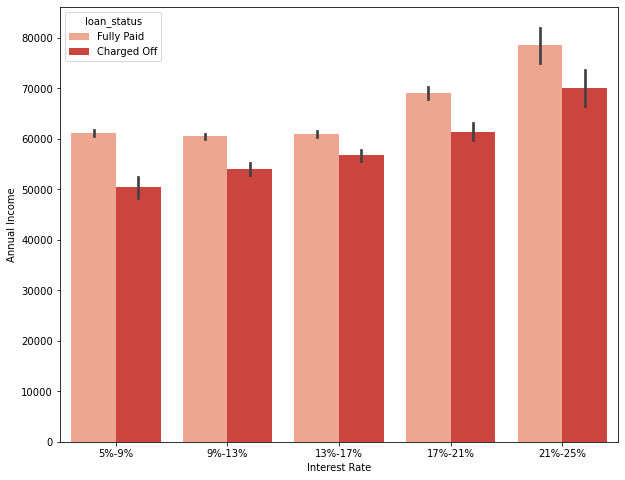

In [250]:
plt.figure(figsize=(10,8))
sns.barplot(data=loan, x='int_rate_groups', y='annual_inc', hue ='loan_status', palette="Reds")
plt.xlabel('Interest Rate')
plt.ylabel('Annual Income')
plt.show()

OBSERVATION: There is a high probability of defaulting when applicants taking loan receive interest at the rate of 21-25% and have an income of 60k-80k

#### Analyzing 'loan amount' with other columns for more insights

##### 1. Loan Amount vs Interest rate

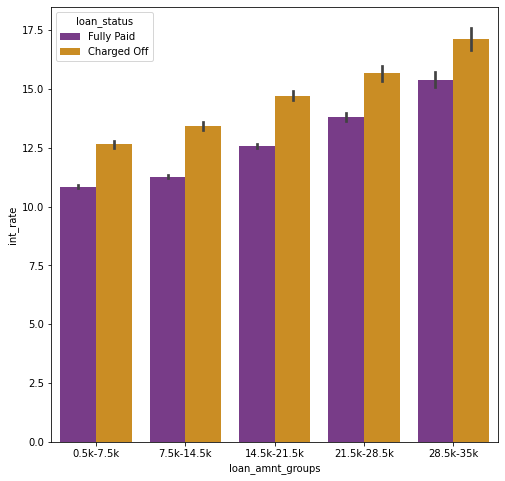

In [251]:
plt.figure(figsize=(8,8))
sns.barplot(data=loan,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="CMRmap")
plt.show()

OBSERVATION: There is a high probability of defaulting when applicants taking loan in the range 28.5k - 35k and are charged interest rate of 15-17.5%

##### 2. Loan Amount vs Loan Purpose

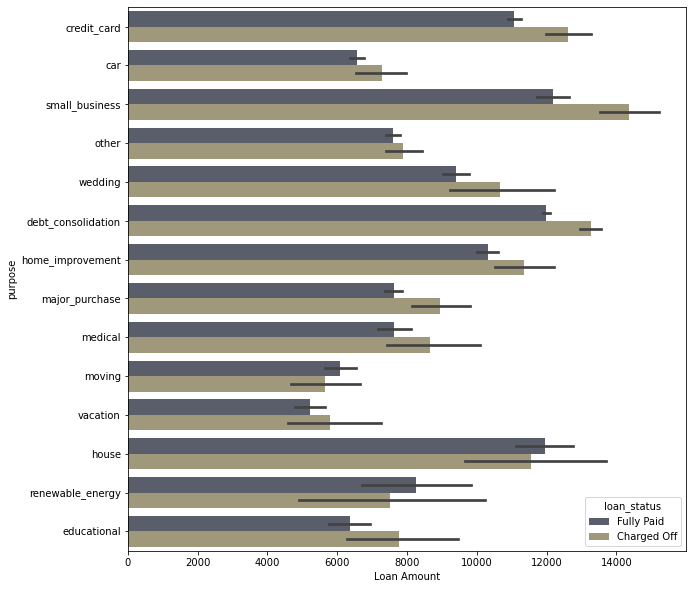

In [252]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan,x='loan_amnt', y='purpose', hue ='loan_status',palette="cividis")
plt.xlabel('Loan Amount')
plt.show()

OBSERVATION: There is a high probability of defaulting when applicants taking loan for small business and the loan amount is greater than 14k

##### 3. Loan Amount vs Home ownership

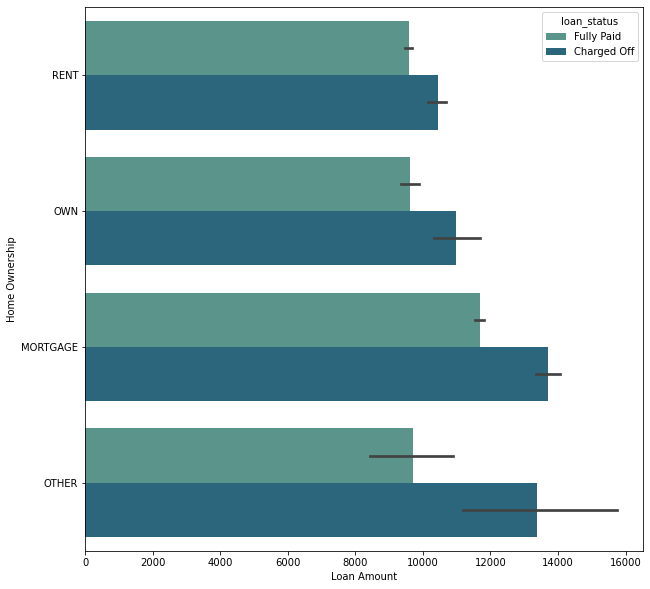

In [253]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="crest")
plt.xlabel('Loan Amount')
plt.ylabel('Home Ownership')
plt.show()

OBSERVATION: There is a high probability of defaulting when applicants taking loan whose home ownership is 'MORTGAGE' and have loan of 14-16k

##### 4. Loan Amount vs Grade 

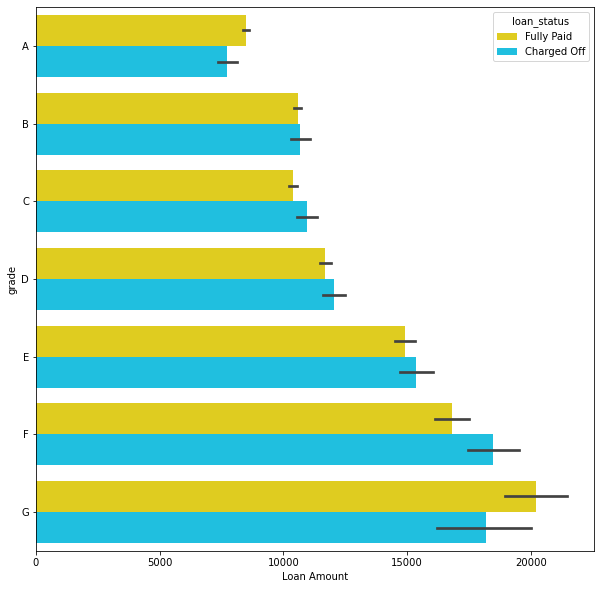

In [254]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan,x='loan_amnt', y='grade', hue ='loan_status',palette="jet_r", order=['A','B','C','D','E','F','G'])
plt.xlabel('Loan Amount')
plt.show()

OBSERVATION: There is a high probability of defaulting when applicants taking loan belong to grade F and loan amount is between 15k-20k

##### 5. Loan Amount vs Employment Length

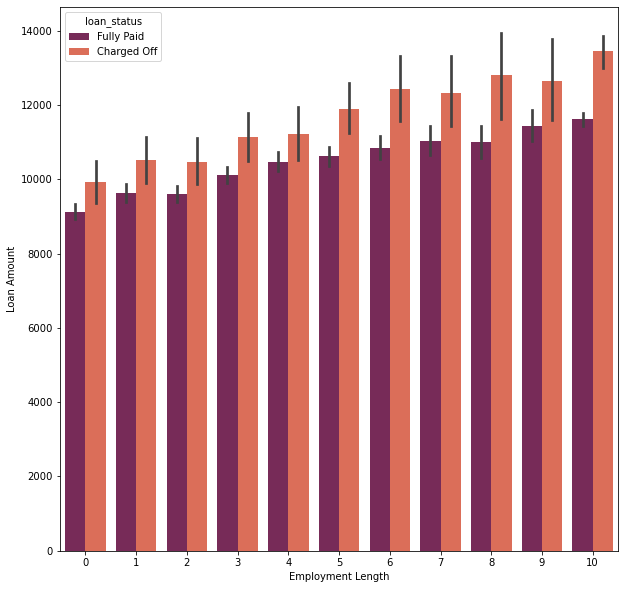

In [255]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan,y='loan_amnt', x='emp_length', hue ='loan_status',palette="rocket")
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.show()

OBSERVATION: There is a high probability of defaulting when applicants taking loan have 10 years of employment length and loan amount is 12k-14k

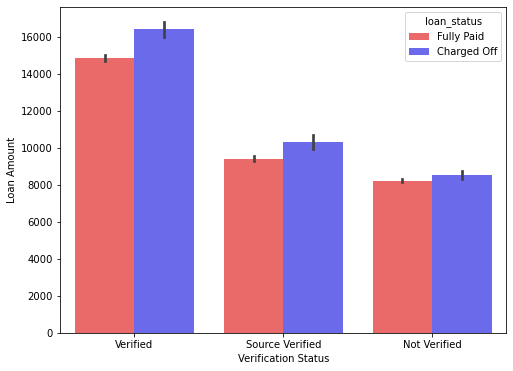

In [256]:
plt.figure(figsize=(8,6))
sns.barplot(data=loan,y='loan_amnt', x='verification_status', hue ='loan_status',palette="seismic_r")
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')
plt.show()

OBSERVATION: There is a high probability of defaulting when applicants taking loan amount above 16k and loan is verified

#### Analyzing 'grade' vs 'interest rate'

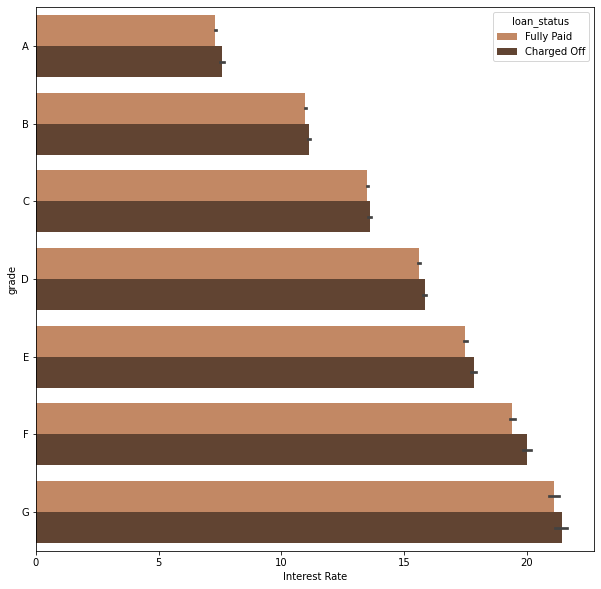

In [257]:
plt.figure(figsize=(10,10))
sns.barplot(data=loan,x='int_rate', y='grade', hue ='loan_status',palette="copper_r", order=['A','B','C','D','E','F','G'])
plt.xlabel('Interest Rate')
plt.show()

OBSERVATION: There is a high probability of defaulting when applicants taking loan belong to grade G and interest rate above 20%

##### Analyzing 'loan amount' vs 'interest rate'

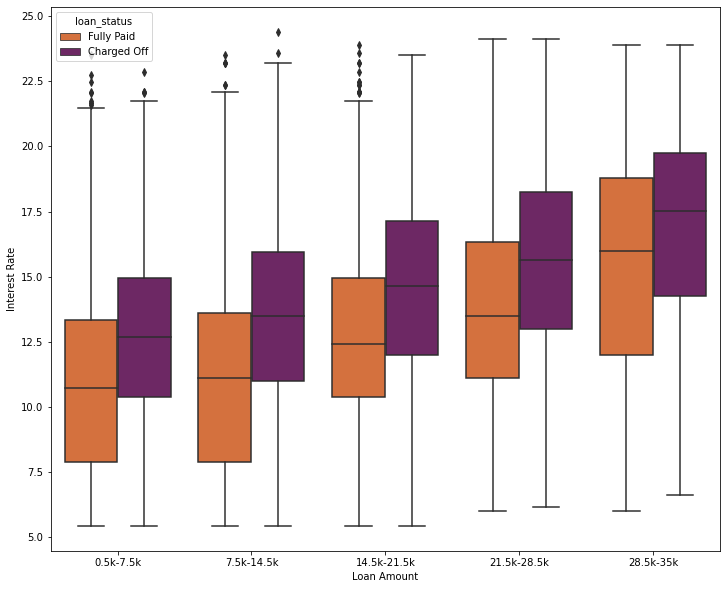

In [258]:
plt.figure(figsize=(12,10))
plt.tight_layout()
sns.boxplot(data =loan,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="inferno_r")
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

IMPORTANT OBSERVATION: The interest rate of charged off loans is very high than that of fully paid loans across all the loan amount groups. This can be really strong driving factor for loan defaulting.

#### Multi-Variate Analysis

In [259]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,pub_rec_bankruptcies,int_rate_groups,annual_inc_groups,installment_groups,loan_amnt_groups,funded_amnt_inv_groups,dti_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,27.65,0.0,9%-13%,4k-31k,15-215,0.5k-7.5k,0-5k,24-30,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,1.00,0.0,13%-17%,4k-31k,15-215,0.5k-7.5k,0-5k,0-6,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,8.72,0.0,13%-17%,4k-31k,15-215,0.5k-7.5k,0-5k,6-12,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,20.00,0.0,13%-17%,31k-58k,215-415,7.5k-14.5k,5k-10k,18-24,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,11.20,0.0,5%-9%,31k-58k,15-215,0.5k-7.5k,0-5k,6-12,Dec,2011


Now let us see how variables are corelated to each other. In order to this, let us filer all the numerical values and will see the correlation of each variable with other numerical variable.

In [260]:
# Filtering all the numerical values to understand their correlation
loan_corr_df = loan[loan.loan_status == 'Charged Off'].filter(["loan_amnt", "funded_amnt_inv",'int_rate','installment','emp_length','annual_inc','dti']) 
corr = loan_corr_df.corr()
round(corr, 3)

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti
loan_amnt,1.000,0.907,0.339,0.927,0.160,0.460,0.078
funded_amnt_inv,0.907,1.000,0.358,0.856,0.177,0.413,0.086
int_rate,0.339,0.358,1.000,0.316,0.014,0.153,0.042
installment,0.927,0.856,0.316,1.000,0.134,0.457,0.054
emp_length,0.160,0.177,0.014,0.134,1.000,0.159,0.066
annual_inc,0.460,0.413,0.153,0.457,0.159,1.000,-0.028
dti,0.078,0.086,0.042,0.054,0.066,-0.028,1.000


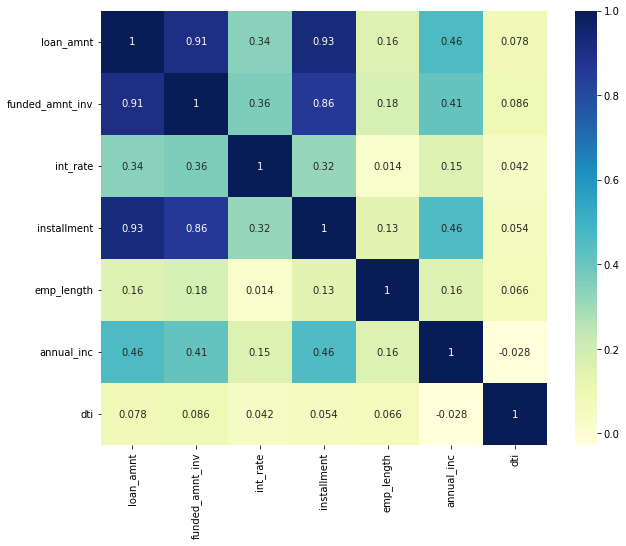

In [261]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

<Figure size 720x576 with 0 Axes>

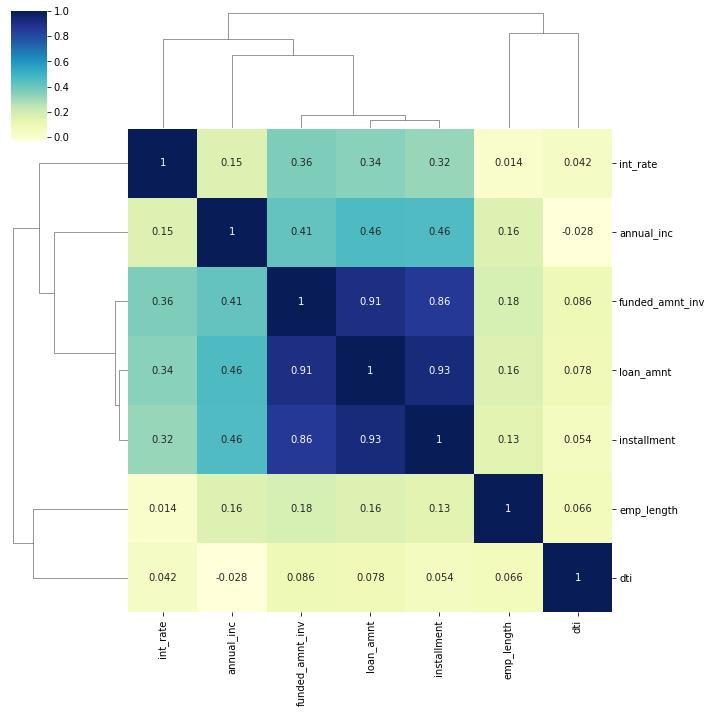

In [262]:
#Plotting cluster map to understand where the cluster lies
plt.figure(figsize=(10,8))

# clustermap
sns.clustermap(corr, cmap="YlGnBu", annot=True)
plt.show()

OBSERVATION: The applicants having high chances of defaulting have following correlation behavior:   
* Loan Amount, Installment and Funded amount by investors are highly correlated. That means, higher the loan amount, higher the installment, and higher the funded amount by investors.   
* Annual income is somewhat correlated but doesn't impach much in terms of funded amount by investors and the loan amount applied.   
* Interest rate is not correlated to Annual Income. That means, the annual income of the defaulting loan applicant doesn't influence the interest rate proposed.   
* Debt-to-Income ratio is negatively corelated to Annual Income. That means, lesser the annual income, higher the debt.        